# Quantum Harmonic Osscilator

<b>Slinkies</b>. They started out as toys.  I still have one to play with on my desk.  
<b>Rubber bands</b> What was once something useful, is now a wonderful projectile weapon.  
<b> Swings</b> I still love them, but people seem to not make them in adult sizes for some reason.

A person's perception of these objects start to change as they enter their first physics class.  Even in that beginning classical mechanics, the problems are filled with harmonic osscilators, like slinkies, rubber bands, or swings, which exert a force proportional to their displacement
\begin{equation}
F=-kx
\end{equation}
and therefore a quadratic potential
\begin{equation}
V(x)=\frac{1}{2} k x^2
\end{equation}

This is all extremely fun and useful in the classical regime, but we add Quantum Mechanics to the mix, and LOW AND BEHOLD! we have one of the few exactly solvable models in Quantum Mechanics. Moreso, this solution demonstrates some extremely important properties of quantum mechanical systems.

##### The Hamiltonian
\begin{equation}
    {\cal H}= \frac{p^2}{2 m} + \frac{1}{2} m \omega ^2 x^2
\end{equation}

##### The Solution
\begin{equation}
    \Psi (x) = \frac{1}{\sqrt{2^n n!}} \left(\frac{m \omega}{\hbar \pi}\right)^{1/4} \mathrm{e}^{-m \omega x^2/2 \hbar}  H_n \left( \sqrt{\frac{m \omega}{\hbar}} x \right)
\end{equation}
Today, I just intend to present the form of the solution, calculate this equation numerically, and visualize the results.  If you wish to know how the equation is derived, you can find a standard quantum mechanics textbook, or stay tuned till I manage to write it up.

### Physicists' Hermite Polynomials
Note: These are not the same as the "probabilists' Hermite Polynomial".  The two functions differ by scaling factors.

Physicists' Hermite polynomials are defined as eigenfunctions for the differential equation
\begin{equation}
u^{\prime \prime}-2xu^{\prime} = -2 \lambda u
\end{equation}

\begin{equation}
H_n(x) = (-1)^n \mathrm{e}^{x^2} \frac{\mathrm{d}^n}{\mathrm{d}x^n}
\left( e^{-x^2} \right)
\end{equation}

I leave it as an exercise to the reader (muahahahaha) to
* demonstrate othogonality with respect to the measure $e^{-x^2}$, ie
\begin{equation}
\int_{-\infty}^{\infty} H_m(x) H_n(x) e^{-x^2} \mathrm{d}x = \sqrt{\pi} 2^n n! \delta_{mn}
\end{equation}
* demonstrate completeness.  This means we can describe every function by a linear combination of Hermite polynomials, provided it is suitably well behaved.


Though a formula exists for calculating a function at $n$ directly, the most efficient method at low $n$ for calculating polynomials relies on recurrence relationships.  These recurrence relationships will also be quite handy if you ever need to show orthogonality, or expectation values.  
##### Recurrence Relations
\begin{equation}
H_{n+1}(x) = 2xH_n(x) - H^{\prime}_n(x)
\end{equation}
\begin{equation}
H^{\prime}_n(x) = 2n H_{n-1}(x)
\end{equation}
\begin{equation}
H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x)
\end{equation}

#### Programming Tip!  
Since Hermite polynomials are generated recursively, I wanted to generate and save all the functions up to a designated value at once.  In order to do so, I created an array, whose values are anonymous functions.  

So let's generate some Hermite polynomials and look at them.  
<b> Make sure you don't call a Hermite you haven't generated yet!

### Finding Zeros
The eigenvalue maps to the number of zeros in the wavefunction.  Below, I use Julia's roots package to identify roots on the interval from -3 to 3.  

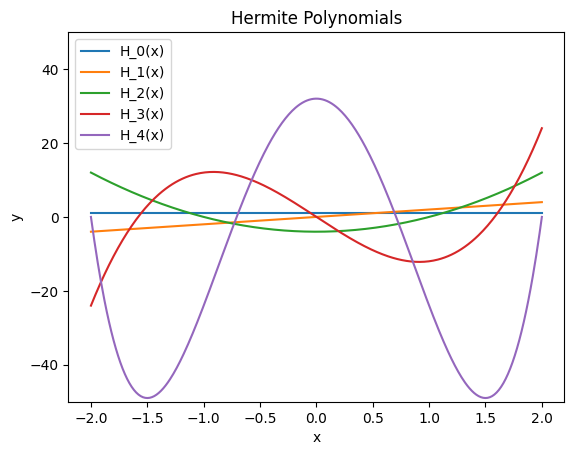

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial, hermite, roots_hermite

# Generate Hermite polynomials
def generate_hermite(n):
    hermite_funcs = [lambda x: np.ones_like(x), lambda x: 2 * x]
    for i in range(2, n):
        hermite_funcs.append(lambda x, i=i: 2 * x * hermite_funcs[i - 1](x) - 2 * i * hermite_funcs[i - 2](x))
    return hermite_funcs

hermite_polys = generate_hermite(5)

x = np.linspace(-2, 2, 400)
plt.figure()
plt.ylim(-50, 50)
for j in range(5):
    plt.plot(x, hermite_polys[j](x), label=f"H_{j}(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hermite Polynomials")
plt.legend()
plt.show()




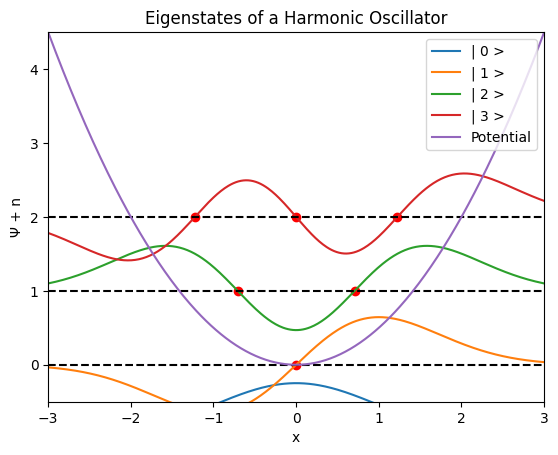

In [20]:
# Constants
m, omega, hbar = 1, 1, 1

# Wavefunction

def psi(n, x):
    Hn = hermite(n)
    norm_factor = 1 / np.sqrt(factorial(n) * 2**n) * (m * omega / (hbar * np.pi))**0.25
    return norm_factor * np.exp(-m * omega * x**2 / (2 * hbar)) * Hn(np.sqrt(m * omega / hbar) * x)

# Find zeros of wavefunctions
zeds = [[]]
for j in range(1, 4):
    roots, _ = roots_hermite(j)
    zeds.append(roots)

# Plot eigenstates
x = np.linspace(-3, 3, 400)
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-0.5, 4.5)
for j in range(4):
    plt.plot(x, psi(j, x) + j - 1, label=f"| {j} >")
    plt.axhline(y=j-1, color='black', linestyle='--')
    plt.scatter(zeds[j], (j-1) * np.ones_like(zeds[j]), color='red')

plt.plot(x, 0.5 * m * omega**2 * x**2, label="Potential")
plt.xlabel("x")
plt.ylabel("Ψ + n")
plt.legend(loc='upper right')
plt.title("Eigenstates of a Harmonic Oscillator")
plt.show()